<a href="https://colab.research.google.com/github/anilbhatt1/CNN/blob/master/EIP4_Session_1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


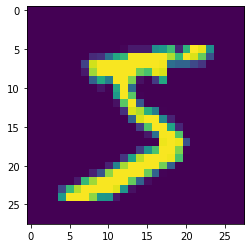

In [42]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [44]:
print (X_train.shape)

(60000, 28, 28, 1)


In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [46]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [48]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(10, (1,1), activation='relu'))
model.add(Convolution2D(10, 10))
model.add(Flatten())
model.add(Activation('softmax'))

In [50]:
print(model.output_shape)

(None, 10)


In [51]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 20, 20, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 10)        2570      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 1, 1, 10)         

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [53]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=15, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/15
60000/60000 [==============================] - 18s 306us/step - loss: 0.1390 - acc: 0.9576
Epoch 2/15
60000/60000 [==============================] - 18s 296us/step - loss: 0.0554 - acc: 0.9829
Epoch 3/15
60000/60000 [==============================] - 18s 292us/step - loss: 0.0408 - acc: 0.9875
Epoch 4/15
60000/60000 [==============================] - 18s 296us/step - loss: 0.0333 - acc: 0.9895
Epoch 5/15
60000/60000 [==============================] - 18s 296us/step - loss: 0.0278 - acc: 0.9914
Epoch 6/15
60000/60000 [==============================] - 18s 295us/step - loss: 0.0243 - acc: 0.9922
Epoch 7/15
60000/60000 [==============================] - 18s 303us/step - loss: 0.0199 - acc: 0.9937
Epoch 8/15
60000/60000 [==============================] - 18s 296us/step - loss: 0.0173 - acc: 0.9943
Epoch 9/15
60000/60000 [==============================] - 18s 297us/step - loss: 0.0142 - acc: 0.9955
Epoch 10/15
60000/60000 [==============================] - 18s 299us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [55]:
print(score)

[0.04720150043003091, 0.9893]


In [0]:
y_pred = model.predict(X_test)

In [57]:
print(y_pred[:9])
print(y_test[:9])

[[1.6940700e-15 1.4944920e-16 2.6885253e-11 2.7157479e-11 2.3467860e-22
  2.2051272e-18 4.6170085e-30 1.0000000e+00 1.3919299e-17 3.2008626e-10]
 [1.5636657e-15 1.7399228e-11 1.0000000e+00 3.0988465e-17 3.3912075e-18
  1.3578735e-22 9.7689296e-12 2.5154514e-20 4.7448634e-14 1.0870259e-17]
 [4.1586885e-14 9.9999976e-01 6.3853647e-09 5.9366498e-11 2.5870634e-07
  4.1489576e-11 1.4716137e-12 9.3708881e-11 4.7899942e-09 4.7510233e-13]
 [9.9999988e-01 2.2157374e-23 8.8895540e-12 4.2822803e-17 1.9449427e-17
  4.6766917e-15 9.9931945e-08 1.3109984e-17 6.2284991e-12 5.8950561e-12]
 [7.4334555e-19 3.2040030e-17 1.5403492e-18 8.0676387e-21 1.0000000e+00
  1.8885535e-22 8.8615323e-17 2.2414160e-19 4.8897399e-15 3.2960423e-11]
 [3.5749910e-14 9.9999642e-01 5.8377121e-09 8.9581947e-10 3.5766973e-06
  7.8813024e-12 2.7681540e-12 2.3678725e-08 2.3767003e-08 7.7664862e-12]
 [2.5862334e-25 1.9648016e-11 1.9632158e-12 1.8453179e-17 9.9999321e-01
  8.4641810e-13 9.4695265e-21 1.4835241e-17 6.2615304e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

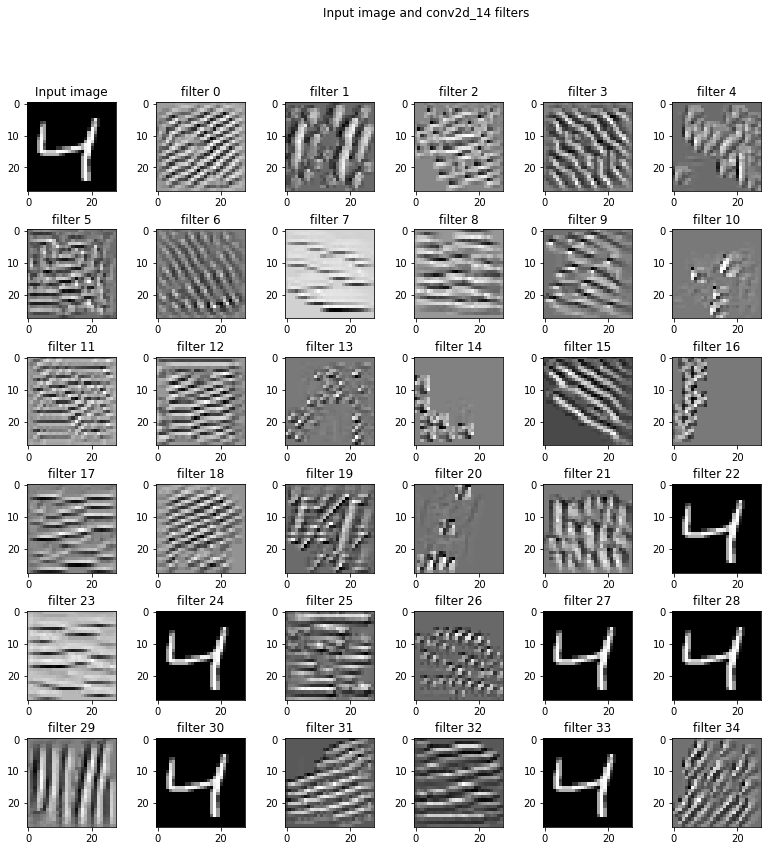

In [59]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()